[Homework 2]('https://colab.research.google.com/github/Jaguar838/llm-zoomcamp/blob/main/HW/2025/02-vector-search/hw-02.ipynb')

In this homework, we will learn more about vector search
and embedding. Like in the module, we will use Qdrant and
fastembed

In [2]:
from fastembed import TextEmbedding

/home/oleg_yamgurov/llm-zoomcamp/.venv/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


## Q1. Embedding the query

Embed the query: `'I just discovered the course. Can I join now?'`.
Use the `'jinaai/jina-embeddings-v2-small-en'` model. 

You should get a numpy array of size 512.

What's the minimal value in this array?

* -0.51
* -0.11
* 0
* 0.51

In [18]:
query = 'I just discovered the course. Can I join now?'

In [4]:
# Загружаем модель
embedder = TextEmbedding(model_name="jinaai/jina-embeddings-v2-small-en")

# Получаем эмбеддинг как генератор
embedding_gen = embedder.embed([query])

# Преобразуем генератор в список и берём первый (и единственный) результат
embedding = list(embedding_gen)[0]

# Выводим минимальное значение
print("Минимальное значение в эмбеддинге:", min(embedding))

Fetching 5 files: 100%|██████████| 5/5 [00:03<00:00,  1.66it/s]


Минимальное значение в эмбеддинге: -0.11726373885183883


## Косинусное сходство

Векторы, которые возвращает наша модель эмбеддингов, уже нормализованы: их длина равна 1.0.

Ты можешь это проверить с помощью функции `norm`:

```python
import numpy as np
np.linalg.norm(q)
```

Это означает, что мы можем просто вычислить *скалярное произведение* двух векторов, чтобы узнать их косинусное сходство.

Например, если вычислить косинусное сходство вектора запроса с самим собой, результат будет 1.0:

```python
q.dot(q)
```

Если хочешь, могу объяснить, что означает нормализация и как косинусное сходство помогает находить похожие тексты.

In [7]:
embedding

array([-7.63946260e-02, -7.30555505e-02,  5.86501763e-02,  3.92670571e-02,
       -1.41797115e-02, -4.68342854e-02,  2.69862822e-02,  3.49039060e-02,
        1.53419217e-03, -1.10407363e-02,  5.57556285e-02, -2.88360142e-02,
       -4.87239498e-02, -9.90923923e-02,  6.02579764e-02, -1.86105379e-02,
       -8.81040139e-03, -3.01994831e-02, -1.42541815e-02, -3.87884212e-02,
       -2.76125662e-02, -6.94957533e-03,  3.20653319e-02, -5.17838394e-03,
        8.37959894e-02, -8.87329606e-02, -7.30260625e-02,  5.92846802e-02,
        4.07805674e-02,  7.72684822e-02, -4.60029697e-02,  3.98426895e-02,
        1.74821510e-02,  8.70263712e-03, -3.09291054e-02,  2.20470391e-02,
        4.76479896e-02,  1.76566196e-02, -3.62013627e-02, -3.53408062e-02,
       -5.92537995e-03,  2.97091202e-02,  8.05883752e-02,  1.07132722e-02,
       -5.38192519e-02, -9.62881111e-03, -1.17263739e-01,  3.36546374e-02,
        7.05763168e-03,  7.70159791e-03, -5.17482529e-02,  5.46955574e-02,
       -7.80289904e-02,  

In [5]:
import numpy as np
np.linalg.norm(embedding)

np.float64(1.0)

In [6]:
embedding.dot(embedding)

np.float64(1.0000000000000002)

## Q2. Cosine similarity with another vector

Now let's embed this document:

```python
doc = 'Can I still join the course after the start date?'
```

What's the cosine similarity between the vector for the query
and the vector for the document?

* 0.3
* 0.5
* 0.7
* 0.9

In [19]:
doc = 'Can I still join the course after the start date?'

In [21]:
# Запит і документ
query = "I just discovered the course. Can I join now?"
doc = "Can I still join the course after the start date?"

# Отримуємо ембеддинги (перший елемент із генератора)
q_vec = list(embedder.embed([query]))[0]
d_vec = list(embedder.embed([doc]))[0]

# Обчислюємо косинусну схожість як скалярний добуток
cosine_similarity = np.dot(q_vec, d_vec)

print(f"Косинусна схожість: {cosine_similarity:.3f}")

Косинусна схожість: 0.901


## Q3. Ranking by cosine

For Q3 and Q4 we will use these documents:

```python
documents = [{'text': "Yes, even if you don't register, you're still eligible to submit the homeworks.\nBe aware, however, that there will be deadlines for turning in the final projects. So don't leave everything for the last minute.",
  'section': 'General course-related questions',
  'question': 'Course - Can I still join the course after the start date?',
  'course': 'data-engineering-zoomcamp'},
 {'text': 'Yes, we will keep all the materials after the course finishes, so you can follow the course at your own pace after it finishes.\nYou can also continue looking at the homeworks and continue preparing for the next cohort. I guess you can also start working on your final capstone project.',
  'section': 'General course-related questions',
  'question': 'Course - Can I follow the course after it finishes?',
  'course': 'data-engineering-zoomcamp'},
 {'text': "The purpose of this document is to capture frequently asked technical questions\nThe exact day and hour of the course will be 15th Jan 2024 at 17h00. The course will start with the first  “Office Hours'' live.1\nSubscribe to course public Google Calendar (it works from Desktop only).\nRegister before the course starts using this link.\nJoin the course Telegram channel with announcements.\nDon’t forget to register in DataTalks.Club's Slack and join the channel.",
  'section': 'General course-related questions',
  'question': 'Course - When will the course start?',
  'course': 'data-engineering-zoomcamp'},
 {'text': 'You can start by installing and setting up all the dependencies and requirements:\nGoogle cloud account\nGoogle Cloud SDK\nPython 3 (installed with Anaconda)\nTerraform\nGit\nLook over the prerequisites and syllabus to see if you are comfortable with these subjects.',
  'section': 'General course-related questions',
  'question': 'Course - What can I do before the course starts?',
  'course': 'data-engineering-zoomcamp'},
 {'text': 'Star the repo! Share it with friends if you find it useful ❣️\nCreate a PR if you see you can improve the text or the structure of the repository.',
  'section': 'General course-related questions',
  'question': 'How can we contribute to the course?',
  'course': 'data-engineering-zoomcamp'}]
```

Compute the embeddings for the text field, and compute the 
cosine between the query vector and all the documents.

What's the document index with the highest similarity? (Indexing starts from 0):

- 0
- 1
- 2
- 3
- 4

Hint: if you put all the embeddings of the text field in one matrix `V` (a single 2-dimensional numpy array), then
computing the cosine becomes a matrix multiplication:

```python
V.dot(q)
```

If this hint is rather confusing you than helping, feel free
to ignore it.

In [26]:
documents = [{'text': "Yes, even if you don't register, you're still eligible to submit the homeworks.\nBe aware, however, that there will be deadlines for turning in the final projects. So don't leave everything for the last minute.",
  'section': 'General course-related questions',
  'question': 'Course - Can I still join the course after the start date?',
  'course': 'data-engineering-zoomcamp'},
 {'text': 'Yes, we will keep all the materials after the course finishes, so you can follow the course at your own pace after it finishes.\nYou can also continue looking at the homeworks and continue preparing for the next cohort. I guess you can also start working on your final capstone project.',
  'section': 'General course-related questions',
  'question': 'Course - Can I follow the course after it finishes?',
  'course': 'data-engineering-zoomcamp'},
 {'text': "The purpose of this document is to capture frequently asked technical questions\nThe exact day and hour of the course will be 15th Jan 2024 at 17h00. The course will start with the first  “Office Hours'' live.1\nSubscribe to course public Google Calendar (it works from Desktop only).\nRegister before the course starts using this link.\nJoin the course Telegram channel with announcements.\nDon’t forget to register in DataTalks.Club's Slack and join the channel.",
  'section': 'General course-related questions',
  'question': 'Course - When will the course start?',
  'course': 'data-engineering-zoomcamp'},
 {'text': 'You can start by installing and setting up all the dependencies and requirements:\nGoogle cloud account\nGoogle Cloud SDK\nPython 3 (installed with Anaconda)\nTerraform\nGit\nLook over the prerequisites and syllabus to see if you are comfortable with these subjects.',
  'section': 'General course-related questions',
  'question': 'Course - What can I do before the course starts?',
  'course': 'data-engineering-zoomcamp'},
 {'text': 'Star the repo! Share it with friends if you find it useful ❣️\nCreate a PR if you see you can improve the text or the structure of the repository.',
  'section': 'General course-related questions',
  'question': 'How can we contribute to the course?',
  'course': 'data-engineering-zoomcamp'}]

In [39]:
doc_vecs = []
for doc in documents:
    qa_text = doc['question']
    embedding = embedder.embed(qa_text)
    doc_vecs.append(list(embedding)[0])

# Перетворюємо список ембеддингів у матрицю
V = np.stack(doc_vecs)
V.shape

(5, 512)

In [40]:
# Косинусна схожість як матричне множення
similarities = V.dot(q_vec)

# Шукаємо індекс найвищої схожості
best_index = int(np.argmax(similarities))

print(f"Документ з найвищою схожістю має індекс: {best_index}")

Документ з найвищою схожістю має індекс: 0


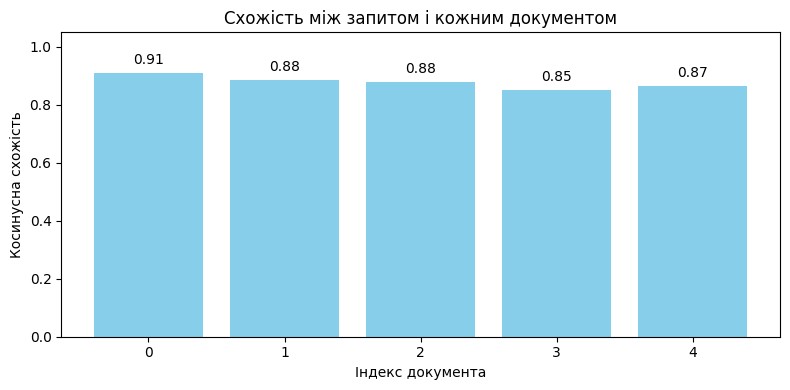

In [41]:
import matplotlib.pyplot as plt

# Побудова графіка
plt.figure(figsize=(8, 4))
bars = plt.bar(range(len(documents)), similarities, color='skyblue')
plt.xlabel("Індекс документа")
plt.ylabel("Косинусна схожість")
plt.title("Схожість між запитом і кожним документом")
plt.xticks(range(len(documents)))
plt.ylim(0, 1.05)

# Підпис значень
for i, bar in enumerate(bars):
    height = bar.get_height()
    plt.text(i, height + 0.02, f"{height:.2f}", ha='center', va='bottom')

plt.tight_layout()
plt.show()

## Q4. Ranking by cosine, version two

Now let's calculate a new field, which is a concatenation of
`question` and `text`:

```python
full_text = doc['question'] + ' ' + doc['text']
``` 

Embed this field and compute the cosine between it and the
query vector. What's the highest scoring document?

- 0
- 1
- 2
- 3
- 4

Is it different from Q3? If yes, why?

In [35]:
doc_vecs = []
for doc in documents:
    qa_text = f"{doc['question']} {doc['text']}"
    embedding = embedder.embed(qa_text)
    doc_vecs.append(list(embedding)[0])

# Перетворюємо список ембеддингів у матрицю
V = np.stack(doc_vecs)
V.shape

(5, 512)

In [36]:
V

array([[-0.03958748, -0.06904069,  0.01146618, ...,  0.09114032,
         0.04739896, -0.01033183],
       [-0.08249755, -0.08627812,  0.00593604, ...,  0.10836487,
         0.05654416,  0.00051011],
       [-0.07798266, -0.05428376,  0.05052968, ...,  0.07455595,
         0.04321019, -0.01098255],
       [-0.0719691 , -0.05147855,  0.02265294, ...,  0.04538724,
         0.09451547, -0.00157571],
       [-0.08384529, -0.05699563,  0.00955793, ...,  0.04386464,
         0.034007  , -0.01080237]], shape=(5, 512))

In [37]:
# Косинусна схожість як матричне множення
similarities = V.dot(q_vec)

# Шукаємо індекс найвищої схожості
best_index = int(np.argmax(similarities))

print(f"Документ з найвищою схожістю має індекс: {best_index}")

Документ з найвищою схожістю має індекс: 0


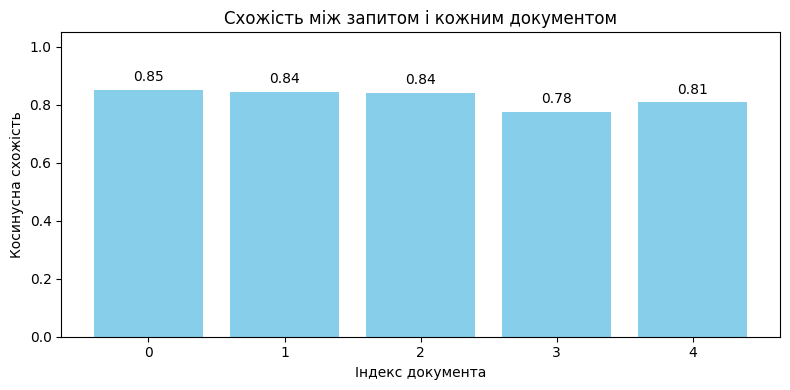

In [38]:
import matplotlib.pyplot as plt

# Побудова графіка
plt.figure(figsize=(8, 4))
bars = plt.bar(range(len(documents)), similarities, color='skyblue')
plt.xlabel("Індекс документа")
plt.ylabel("Косинусна схожість")
plt.title("Схожість між запитом і кожним документом")
plt.xticks(range(len(documents)))
plt.ylim(0, 1.05)

# Підпис значень
for i, bar in enumerate(bars):
    height = bar.get_height()
    plt.text(i, height + 0.02, f"{height:.2f}", ha='center', va='bottom')

plt.tight_layout()
plt.show()

## Q5. Selecting the embedding model

Now let's select a smaller embedding model.
What's the smallest dimensionality for models in fastembed?

- 128
- 256
- 384
- 512

One of these models is `BAAI/bge-small-en`. Let's use it.

In [46]:
import json

EMBEDDING_DIMENSIONALITY = 384

for model in TextEmbedding.list_supported_models():
    if model["dim"] == EMBEDDING_DIMENSIONALITY:
        print(json.dumps(model, indent=2))

{
  "model": "BAAI/bge-small-en",
  "sources": {
    "hf": "Qdrant/bge-small-en",
    "url": "https://storage.googleapis.com/qdrant-fastembed/BAAI-bge-small-en.tar.gz",
    "_deprecated_tar_struct": true
  },
  "model_file": "model_optimized.onnx",
  "description": "Text embeddings, Unimodal (text), English, 512 input tokens truncation, Prefixes for queries/documents: necessary, 2023 year.",
  "license": "mit",
  "size_in_GB": 0.13,
  "additional_files": [],
  "dim": 384,
  "tasks": {}
}
{
  "model": "BAAI/bge-small-en-v1.5",
  "sources": {
    "hf": "qdrant/bge-small-en-v1.5-onnx-q",
    "url": null,
    "_deprecated_tar_struct": false
  },
  "model_file": "model_optimized.onnx",
  "description": "Text embeddings, Unimodal (text), English, 512 input tokens truncation, Prefixes for queries/documents: not so necessary, 2023 year.",
  "license": "mit",
  "size_in_GB": 0.067,
  "additional_files": [],
  "dim": 384,
  "tasks": {}
}
{
  "model": "snowflake/snowflake-arctic-embed-xs",
  "sou

## Q6. Indexing with qdrant (2 points)

For the last question, we will use more documents.

We will select only FAQ records from our ml zoomcamp:

```python
import requests 

docs_url = 'https://github.com/alexeygrigorev/llm-rag-workshop/raw/main/notebooks/documents.json'
docs_response = requests.get(docs_url)
documents_raw = docs_response.json()


documents = []

for course in documents_raw:
    course_name = course['course']
    if course_name != 'machine-learning-zoomcamp':
        continue

    for doc in course['documents']:
        doc['course'] = course_name
        documents.append(doc)
```

Add them to qdrant using the model form Q5.

When adding the data, use both question and answer fields:

```python
text = doc['question'] + ' ' + doc['text']
```

After the data is inserted, use the question from Q1 for querying the collection.

What's the highest score in the results?
(The score for the first returned record):

- 0.97
- 0.87
- 0.77
- 0.67

In [47]:
import requests 

docs_url = 'https://github.com/alexeygrigorev/llm-rag-workshop/raw/main/notebooks/documents.json'
docs_response = requests.get(docs_url)
documents_raw = docs_response.json()


documents = []

for course in documents_raw:
    course_name = course['course']
    if course_name != 'machine-learning-zoomcamp':
        continue

    for doc in course['documents']:
        doc['course'] = course_name
        documents.append(doc)

In [ ]:
from qdrant_client import QdrantClient, models
qd_client = QdrantClient("http://localhost:6333")
model_handle = "BAAI/bge-small-en"
collection_name = "ml-zoomcamp"
qd_client.delete_collection(collection_name=collection_name)
qd_client.create_collection(
    collection_name=collection_name,
    vectors_config=models.VectorParams(
        size=EMBEDDING_DIMENSIONALITY,
        distance=models.Distance.COSINE
    )
)
qd_client.create_payload_index(
    collection_name=collection_name,
    field_name="course",
    field_schema="keyword"
)
points = []

for i, doc in enumerate(documents):
    text = doc['question'] + ' ' + doc['text']
    vector = models.Document(text=text, model=model_handle)
    point = models.PointStruct(
        id=i,
        vector=vector,
        payload=doc
    )
    points.append(point)

In [64]:
qd_client.upsert(
    collection_name=collection_name,
    points=points
)

Fetching 5 files: 100%|██████████| 5/5 [00:00<00:00,  7.29it/s]


UpdateResult(operation_id=2, status=<UpdateStatus.COMPLETED: 'completed'>)

In [65]:
question = 'I just discovered the course. Can I join now?'

In [66]:
embedder = TextEmbedding(model_name="BAAI/bge-small-en")

In [67]:
query_vec = list(embedder.embed([question]))[0]

In [72]:
search_results = qd_client.query_points(
    collection_name=collection_name,
    query=query_vec,
    limit=1
)

print("Найвищий бал:", search_results)

Найвищий бал: points=[ScoredPoint(id=14, version=2, score=0.8703172, payload={'text': 'Yes, you can. You won’t be able to submit some of the homeworks, but you can still take part in the course.\nIn order to get a certificate, you need to submit 2 out of 3 course projects and review 3 peers’ Projects by the deadline. It means that if you join the course at the end of November and manage to work on two projects, you will still be eligible for a certificate.', 'section': 'General course-related questions', 'question': 'The course has already started. Can I still join it?', 'course': 'machine-learning-zoomcamp'}, vector=None, shard_key=None, order_value=None)]
